# Model performance figure
- This script is used to visualize model performance;
- Simulations: CNTL, WRF_LCZ, LI_LCZ, CESM_LCZ;

In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cftime
import geocat.viz as gv
import string
import math

In [17]:
output_dir = '/mnt/iusers01/fatpou01/sees01/a16404ys/scratch/output_analysis/project2/sp/anthro/'
data = pd.read_csv(output_dir + 'ahf.csv')
result1= pd.read_csv(output_dir + 'flux.csv') # other urban heat flux variables
msites = ["AU-Pre","AU-Sur","CA-Sun","FI-Kum","FI-Tor",
          "FR-Cap","GR-HEC","JP-Yoy","KR-Jun","KR-Och",
          "MX-Esc","NL-Ams","PL-Lip","PL-Nar","SG-Tel",
          "UK-Kin","UK-Swi","US-Bal","US-Mi1","US-Mi2",
          "US-Wes"]
lc0 = '#083550'
lc1 = '#006bac'
lc2 = '#3da4e3'
lc3 = '#6c64d4'
lc4 = '#1a8865'
lc5 = '#cb682c'
# lc0: provided
# lc5: CNTL
# lc4: wrflcz
# lc1: lilcz
# lc3: base
lc = [lc0, lc5, lc4, lc1, lc3]
colors2 = [lc3, lc1, lc4, lc5]
colors = [lc5, lc4, lc1, lc3]
alpha = [0.2, 0.15, 0.1, 0.1]
linewidth = 2
labelcolor = '#6b6b6b'
padding = 8
pad = 1
xwidth = 1
length = 8
handletextpad = 1
model_lable = ['obs', 'def', 'wrf', 'li', 'base']
model_lable2 = ['def', 'wrflcz', 'lilcz', 'base']

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

text_x = 0.175
text_y = 0.765
offset_y = 0.05

#labels = ['S-CNTL', 'S-WRF_LCZ', 'S-LI_LCZ']
labels = ['CNTL', 'WRF_LCZ', 'LI_LCZ', 'CESM_LCZ']
var_list = ['Rn', 'SWup', 'LWup', 'Qh', 'Qle', 'Qtau', 'Qahf']
var_list2 = ['$R_{n}$', '$SW_{up}$', '$LW_{up}$', '$Q_{h}$', '$Q_{le}$', '$Q_{tau}$', '$Q_{ahf}$']

labelfont = 18
# need to change RMSE values when updating data
modelname = ['Provided', 
             'RMSE CNTL: 27.7', 
             'RMSE WRF_LCZ: 28.9', 
             'RMSE LI_LCZ: 29.0',
             'RMSE CESM_LCZ: 26.6']

In [4]:
print(rmse(data['def'], data['obs']))

27.687083743085246


In [5]:
print(rmse(data['wrf'], data['obs']))

28.933690455832526


In [6]:
print(rmse(data['li'], data['obs']))

28.953772229673813


In [7]:
print(rmse(data['base'], data['obs']))

26.603834909483613


In [8]:
data

,Unnamed: 0,obs,def,wrf,li,base
0,0,11.0,3.673763,0.357257,0.379587,2.227173
1,1,9.7,4.702309,0.442259,0.462739,2.931951
2,2,12.8,2.691127,1.025522,1.030529,2.300033
3,3,6.8,7.029572,5.433534,5.422522,8.027582
4,4,14.2,22.683951,16.969729,16.100199,29.292945
5,5,47.5,6.255516,4.804058,4.715139,10.347942
6,6,17.4,0.092012,0.034314,0.027888,0.624911
7,7,20.0,1.806313,1.089640,1.071925,3.015803
8,8,92.7,6.959473,6.971582,6.927211,10.547965
9,9,3.3,2.596283,2.243995,2.173448,3.372545


In [18]:
std_def = float(np.std(data['def']))/float(np.std(data['obs']))
std_wrf = float(np.std(data['wrf']))/float(np.std(data['obs']))
std_li = float(np.std(data['li']))/float(np.std(data['obs']))
std_base = float(np.std(data['base']))/float(np.std(data['obs']))

coef_def = float(xr.corr(xr.DataArray(data['def'].values), xr.DataArray(data['obs'].values)))
coef_wrf = float(xr.corr(xr.DataArray(data['wrf'].values), xr.DataArray(data['obs'].values)))
coef_li = float(xr.corr(xr.DataArray(data['li'].values), xr.DataArray(data['obs'].values)))
coef_base = float(xr.corr(xr.DataArray(data['base'].values), xr.DataArray(data['obs'].values)))

result3 = pd.concat([result1, pd.DataFrame([{'Variable': 'Qahf', 'Model': 'CNTL', 'mean_sdev': std_def, 'mean_coef': coef_def},
                                          {'Variable': 'Qahf', 'Model': 'WRF_LCZ', 'mean_sdev': std_wrf, 'mean_coef': coef_wrf},
                                          {'Variable': 'Qahf', 'Model': 'LI_LCZ', 'mean_sdev': std_li, 'mean_coef': coef_li},
                                          {'Variable': 'Qahf', 'Model': 'CESM_LCZ', 'mean_sdev': std_base, 'mean_coef': coef_base} ])], ignore_index=True)     

model_order = ['CNTL', 'WRF_LCZ', 'LI_LCZ', 'CESM_LCZ']
result3['Model'] = pd.Categorical(result3['Model'], categories=model_order, ordered=True)
stddev = result3.pivot(index='Model', columns='Variable', values='mean_sdev')
stddev = stddev[var_list].to_numpy()
corrcoef = result3.pivot(index='Model', columns='Variable', values='mean_coef')
corrcoef= corrcoef[var_list].to_numpy()  
              

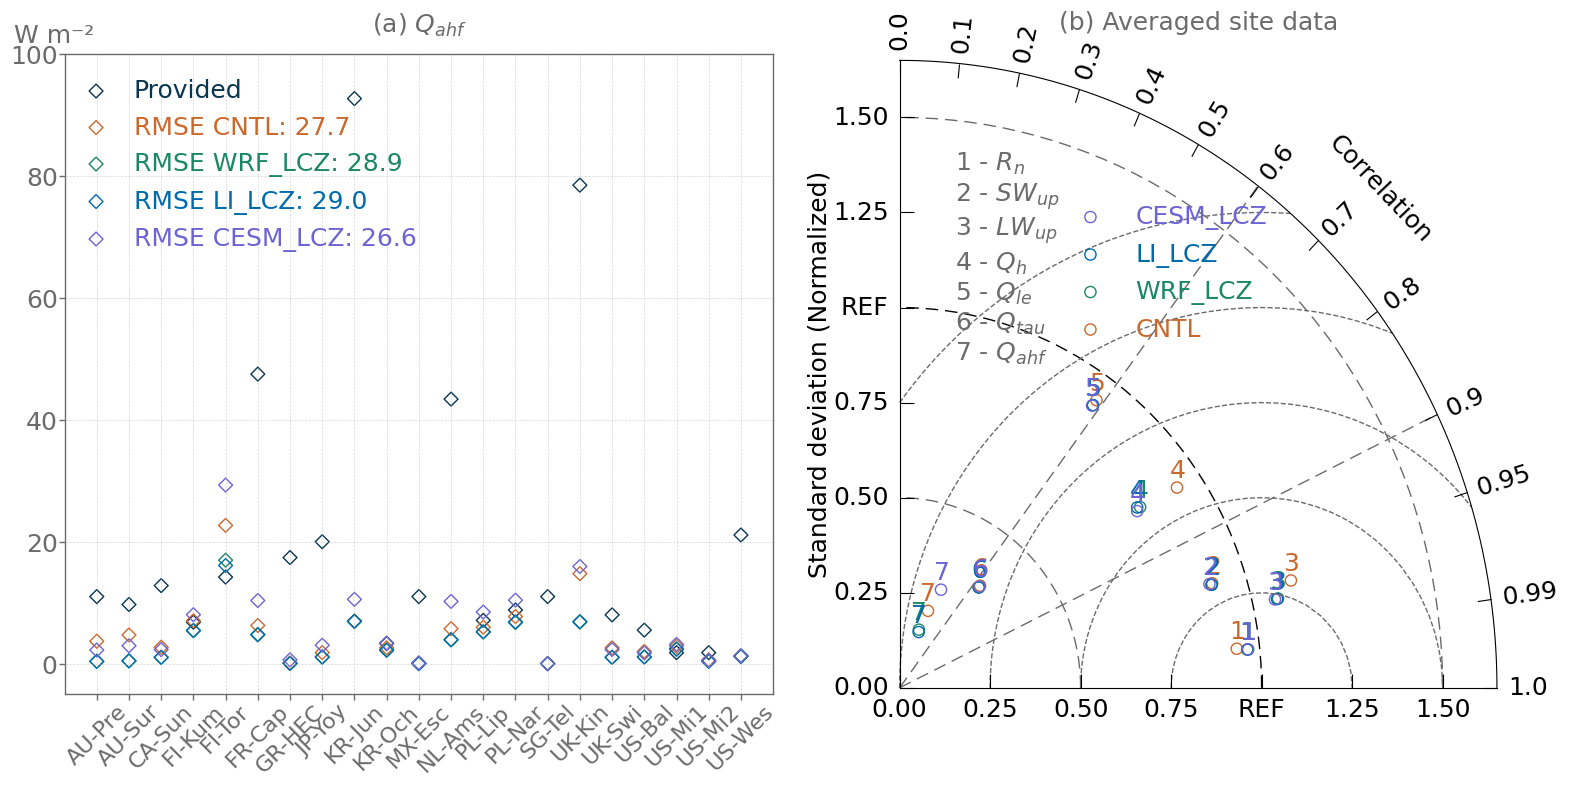

In [19]:
fig = plt.figure(figsize=(16,8))
# ahf
ax1 = fig.add_subplot(1, 2, 1)
for i in range(5):
    ax1.scatter(msites, data[model_lable[i]], color = lc[i], marker='D', facecolors='none', 
                s=50, label=modelname[i])

ax1.set_title('(a) $Q_{ahf}$',
              fontsize=labelfont,color=labelcolor, pad = padding*2)
ax1.tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,
                labelsize=labelfont,pad=pad, width = xwidth, length = length/2)
ax1.tick_params(axis='x', which='both', rotation=45, top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,
                labelsize=labelfont-2,pad=pad, width = xwidth, length = length/2)
ax1.spines['top'].set_color(labelcolor)
ax1.spines['right'].set_color(labelcolor)
ax1.spines['bottom'].set_color(labelcolor)
ax1.spines['left'].set_color(labelcolor)
ax1.spines['top'].set_linewidth(xwidth)
ax1.spines['right'].set_linewidth(xwidth)
ax1.spines['bottom'].set_linewidth(xwidth)
ax1.spines['left'].set_linewidth(xwidth)
ax1.set_ylim(-5, 100)
ax1.set_ylabel('W m⁻²', labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
ax1.yaxis.set_label_coords(-0.015, 1.01)
plt.grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
plt.grid(True) 

lines1, label1 = ax1.get_legend_handles_labels()
legend = fig.legend(lines1, label1, bbox_to_anchor=(0.025, 0.65), loc='lower left', frameon=False, 
                    handletextpad=handletextpad/2, fontsize=labelfont, ncol=1)
for i, text in enumerate(legend.get_texts()):
        text.set_color(lc[i])

ax2 = fig.add_subplot(1,2,2)

da = gv.TaylorDiagram(refstd=1, fig=fig,  rect=122,label='REF')
for j in range(4):
    model = labels[j]
    da.add_model_set(stddev[j],
                         corrcoef[j],
                         #xytext=(-11, 25), # marker label location, in pixels
                         xytext=(-7.5, 10),
                         fontsize=labelfont,
                         color=colors[j],
                         label=labels[j],
                         marker='o', 
                         facecolors='none',
                         s=65,
                    annotate_on=True)
    
da.add_title('(b) Averaged site data', y_loc = 1.025, fontsize=labelfont, color=labelcolor)
legend2 = da.add_legend(xloc=0.65, yloc=0.8, fontsize=labelfont)

for i, text in enumerate(legend2.get_texts()):
        text.set_color(colors2[i])

da.set_fontsizes_and_pad(ticklabel_fontsize=labelfont, axislabel_fontsize=labelfont, axislabel_pad=pad)
da.add_model_name(var_list2, x_loc = 0.1, y_loc = 0.85, fontsize=labelfont, **{'color':labelcolor}) # add 1-6 label
da.add_std_grid(np.array([0.5, 1.5]), color=labelcolor, linewidth=xwidth)
da.add_corr_grid(np.array([0.6, 0.9]), color=labelcolor,linewidth=xwidth)
#kwargs = {'linestyles': '--'}
# kwargs = {'linestyle': '--'} does not work, should be pl
da.add_contours(levels=np.arange(0, 1.5, 0.25), colors=labelcolor, linewidths=xwidth, **{'linestyles': '--'}) 
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xticks([])
ax2.set_yticks([])

plt.subplots_adjust(left=0.035, right=0.965, bottom=0.125, top=0.925, wspace=0.1)
fig.savefig(output_dir + 'ahf.png', dpi=300) 
fig.savefig(output_dir + 'ahf.pdf', dpi=600) 

# Description

In [ ]:
data